<a href="https://colab.research.google.com/github/EthanR54/Rad-15-SLDP/blob/main/Copy_of_RAD_15_SLDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#upload kaggle.json file
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"emmettralston","key":"59bf103e9f5a2015964768b7d8437813"}'}

In [4]:
import os
# Creates Kaggle directory
os.makedirs('/root/.kaggle/', exist_ok=True)

# Moves kaggle.json file to Kaggle directory
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


In [5]:
#Downloads dataset from kaggle
!kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset
License(s): CC0-1.0
 99% 1.24G/1.25G [00:12<00:00, 110MB/s]
100% 1.25G/1.25G [00:12<00:00, 106MB/s]


In [11]:
!unzip plant-disease-recognition-dataset.zip -d /content/plant-disease-recognition-dataset

Archive:  plant-disease-recognition-dataset.zip
replace /content/plant-disease-recognition-dataset/Test/Test/Healthy/8ddaa5a5caa5caa8.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
import os
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Number of images for test, train, and validation
def total_files(folder_path):
  num_files = len([i for i in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, i))])
  return num_files

train_files_healthy = "/content/plant-disease-recognition-dataset/Train/Train/Healthy"
train_files_unhealthy = "/content/plant-disease-recognition-dataset/Train/Train/Rust"


test_files_healthy = "/content/plant-disease-recognition-dataset/Test/Test/Healthy"
test_files_unhealthy = "/content/plant-disease-recognition-dataset/Test/Test/Rust"

validation_files_healthy = "/content/plant-disease-recognition-dataset/Validation/Validation/Healthy"
validation_files_unhealthy = "/content/plant-disease-recognition-dataset/Validation/Validation/Rust"

print('Num of healthy train files:', total_files(train_files_healthy))
print('Num of unhealthy train files:', total_files(train_files_unhealthy))
print()
print('Num of healthy test files:', total_files(test_files_healthy))
print('Num of unhealthy test files:', total_files(test_files_unhealthy))
print()
print('Num of healthy validation files:', total_files(validation_files_healthy))
print('Num of unhealthy validation files:', total_files(validation_files_unhealthy))

Num of healthy train files: 458
Num of unhealthy train files: 434

Num of healthy test files: 50
Num of unhealthy test files: 50

Num of healthy validation files: 20
Num of unhealthy validation files: 20


In [12]:
#Loading Data Sets of Images
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/plant-disease-recognition-dataset/Train/Train",
    image_size=(225, 225),
    batch_size=32,
    seed=15,
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/plant-disease-recognition-dataset/Test/Test",
    image_size=(225, 225),
    batch_size=32,
    seed=15,
)

validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/plant-disease-recognition-dataset/Validation/Validation",
    image_size=(225, 225),
    batch_size=32,
    seed=15,
)

Found 1322 files belonging to 3 classes.
Found 150 files belonging to 3 classes.
Found 60 files belonging to 3 classes.


In [13]:
#Normalizing data into values between 0 and 1
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
test_data = test_data.map(lambda x, y: (normalization_layer(x), y))
validation_data = validation_data.map(lambda x, y: (normalization_layer(x), y))

In [14]:
#Compiling the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(225, 225, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 223, 223, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 244s 6s/step - accuracy: 0.4713 - loss: 1.5216 - val_accuracy: 0.7167 - val_loss: 0.5984
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 248s 6s/step - accuracy: 0.7797 - loss: 0.5239 - val_accuracy: 0.8333 - val_loss: 0.4091
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 226s 5s/step - accuracy: 0.9176 - loss: 0.2460 - val_accuracy: 0.7500 - val_loss: 0.7848
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 250s 5s/step - accuracy: 0.9189 - loss: 0.2409 - val_accuracy: 0.7333 - val_loss: 0.5932
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 269s 5s/step - accuracy: 0.9116 - loss: 0.2671 - val_accuracy: 0.8500 - val_loss: 0.2872


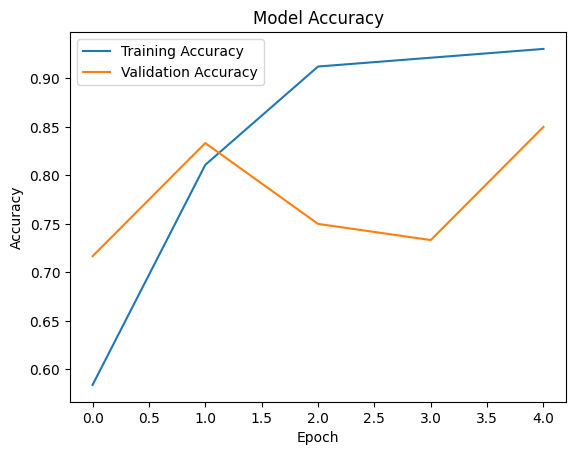

In [17]:
# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [22]:
#Convert model to tensor flow lite
#Convert model to tensor flow lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)


Saved artifact at '/tmp/tmphlnxbmet'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 225, 225, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  139400080655808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139400080665488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139400080663376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139400080655456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139400080662496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139400080668128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139400080660032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139400080666016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139400149513872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139400080657744: TensorSpec(shape=(), dtype=tf.resource, name=None)
